<a href="https://colab.research.google.com/github/AnujPathekar/EDA_On_TitanicDataset/blob/main/EDA_on_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis

## 1. Analysis
1. Univariate Analysis
2. Multivariate Analysis


## 2. Feature Engineering
1. Creating New Columns
2. Modifying Existing Ones

## 3. Handling Outliers
1. Detect Outliers
2. Remove Outliers


# EDA on Titanic Dataset

In [97]:
import numpy as np #For Linear Algebra
import pandas as pd  #For Loading CSV Files As Well As Data PreProcessing
import matplotlib.pyplot as plt
import seaborn as sns


In [98]:
#Importing Dataset From GoogleDrive
df=pd.read_csv("/content/drive/MyDrive/GoogleColabs/titanictested.csv")

In [99]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [100]:
#Shape of Dataset
df.shape

(418, 12)

In [101]:
#Listing Down The Columns
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## Categorical Columns

- Survived
- Pclass
- Sex
- Sibsp
- Parch
- Embarked

## Numerical Columns

- Age
- Fare
- PassengerId

## Mixed Columns
- Name
- Ticket
- Cabin

In [102]:
#Overview of The Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [103]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [104]:
# Missing Values In Age, Fare, Cabin Columns
# More Than 80% Values Are Missing In Cabin Columns (Drop It)

In [105]:
#Dropping Cabin Columns
df.drop(columns=['Cabin'],inplace=True)

In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [107]:
#Imputing Missing Values For Age (By Using Mean)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [108]:
#Imputing Missing Values For Fare

df['Fare'].value_counts()

#Since There Is Only One Missing Value In "Fare" Column So We Can Fill With Mean.

df['Fare'].fillna(df['Fare'].mean(),inplace=True)

In [109]:
#Now We Can Work On Dataset As There Is No Missing Value Present

df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Changing DataType For The Following Columns

- Survived (Category)
- PClass (Category)
- Sex (Category)
- Age (Int)
- Embarked (Category)



In [110]:
df['Survived'] = df['Survived'].astype('category')
df['Pclass'] = df['Pclass'].astype('category')
df['Sex'] =df['Sex'].astype('category')
df['Age'] = df['Age'].astype('int')
df['Embarked'] = df['Embarked'].astype('category')

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Survived     418 non-null    category
 2   Pclass       418 non-null    category
 3   Name         418 non-null    object  
 4   Sex          418 non-null    category
 5   Age          418 non-null    int64   
 6   SibSp        418 non-null    int64   
 7   Parch        418 non-null    int64   
 8   Ticket       418 non-null    object  
 9   Fare         418 non-null    float64 
 10  Embarked     418 non-null    category
dtypes: category(4), float64(1), int64(4), object(2)
memory usage: 25.1+ KB


In [112]:
df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,30.191388,0.447368,0.392344,35.627188
std,120.810458,12.654104,0.896760,0.981429,55.840500
min,892.000000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,76.000000,8.000000,9.000000,512.329200


## Univariate Analysis

Out of 418 Passengers 64 % People Died In The Accident 


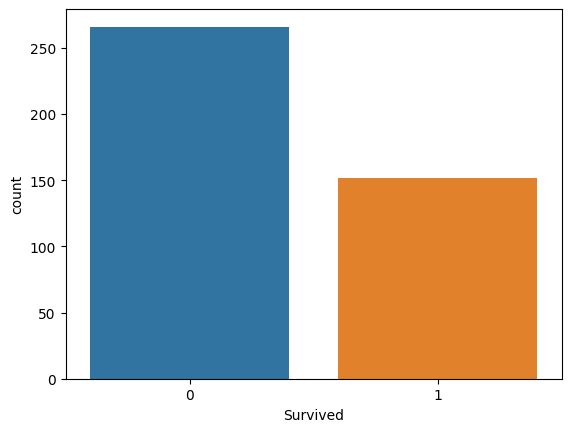

In [113]:
#Starting With Survived Columns

sns.countplot(x='Survived', data=df)

death_percent = round((df['Survived'].value_counts().values[0]/418)*100)

print('Out of 418 Passengers {} % People Died In The Accident '.format(death_percent))

3    52.153110
1    25.598086
2    22.248804
Name: Pclass, dtype: float64


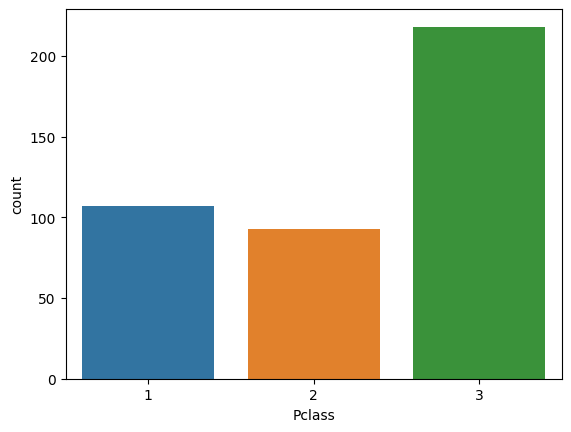

In [114]:
#Pclass Column

print((df['Pclass'].value_counts()/418)*100)

sns.countplot(x='Pclass', data=df)
plt.show()

#Conclusion : Pclass was the most crowded class.

male      63.636364
female    36.363636
Name: Sex, dtype: float64


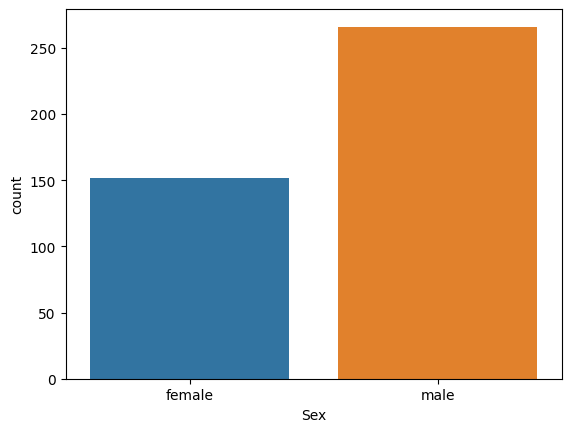

In [115]:
print((df['Sex'].value_counts()/418)*100)

sns.countplot(x='Sex', data=df)
plt.show()

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


<Axes: xlabel='SibSp', ylabel='count'>

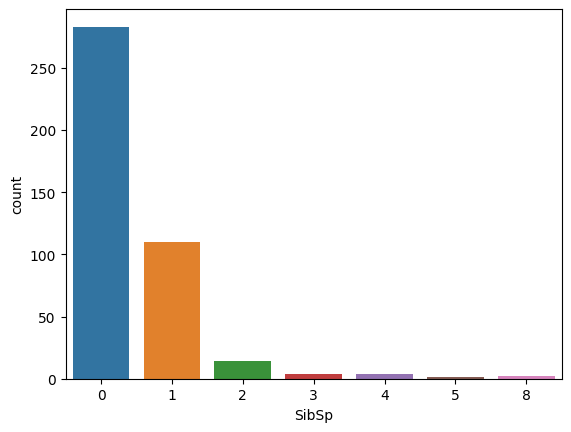

In [116]:
print(df['SibSp'].value_counts())

sns.countplot(x='SibSp', data=df)

0    77.511962
1    12.440191
2     7.894737
3     0.717703
4     0.478469
9     0.478469
6     0.239234
5     0.239234
Name: Parch, dtype: float64


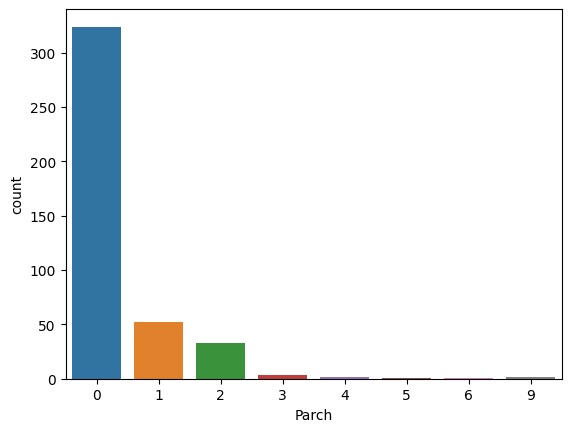

In [117]:
print((df['Parch'].value_counts()/418)*100)

sns.countplot(x='Parch', data=df)
plt.show()

S    64.593301
C    24.401914
Q    11.004785
Name: Embarked, dtype: float64


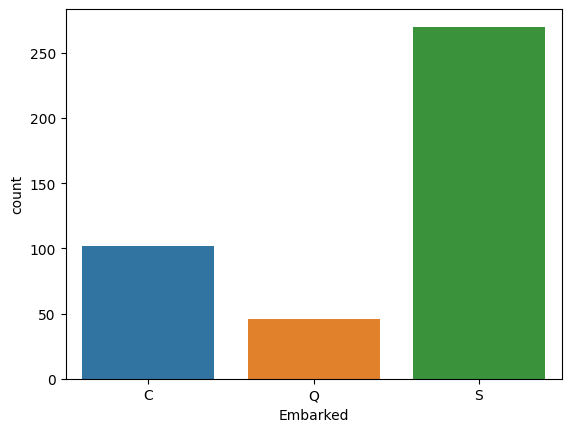

In [118]:
print((df['Embarked'].value_counts()/418)*100)

sns.countplot(x='Embarked', data=df)
plt.show()

## Age Column

0.516080054627597
0.9003780571212805


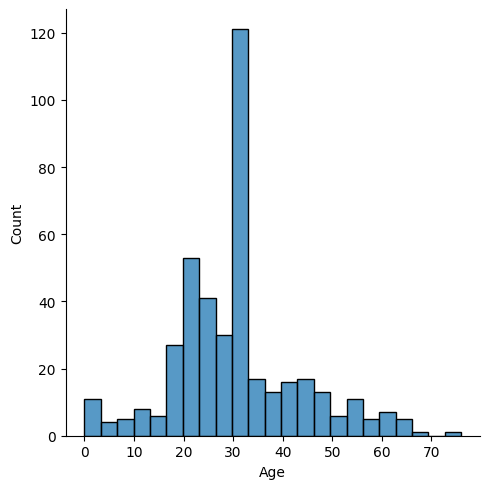

In [119]:


sns.displot(df['Age'])

print(df['Age'].skew())

print(df['Age'].kurt())
plt.show()

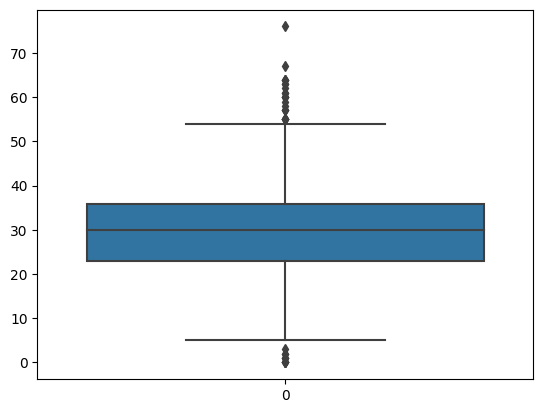

In [120]:
sns.boxplot(df['Age'])
plt.show()

In [121]:
print('People With Age In Between 60-70 Are ',df[(df['Age']>60) & (df['Age']<70)].shape[0])

People With Age In Between 60-70 Are  9


In [122]:
print('People With Age In Between 70-80 Are ',df[(df['Age']>70) & (df['Age']<80)].shape[0])

People With Age In Between 70-80 Are  1


In [123]:
print('People With Age Greater Than 80 Are ',df[df['Age']>80].shape[0])

People With Age Greater Than 80 Are  0


In [124]:
print('People With Age In Between 20-60 Are ',df[(df['Age']>20) & (df['Age']<50)].shape[0])

People With Age In Between 20-60 Are  313


In [125]:
print('People With Age In Between  0-20 Are ',df[(df['Age']>0) & (df['Age']<20)].shape[0])

People With Age In Between  0-20 Are  56


##### People With Age In Between  0-20 Are  56
##### People With Age In Between 20-60 Are  313
##### People With Age Greater Than 80 Are  0
##### People With Age In Between 70-80 Are  1
##### People With Age In Between 60-70 Are  9



## Fare Column

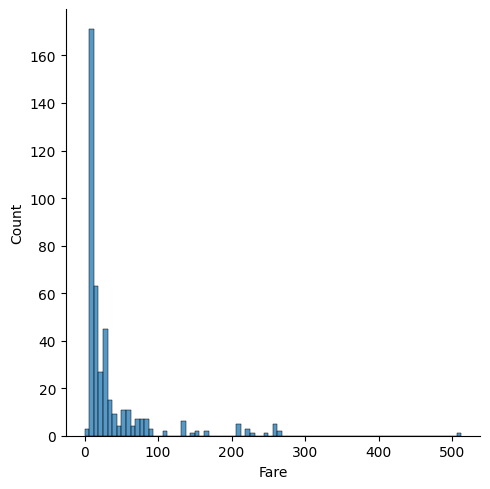

In [126]:
sns.displot(df['Fare'])
plt.show()

In [127]:
print(df['Fare'].skew())
print(df['Fare'].kurt())

3.6915998329393105
17.971266196944526


<Axes: >

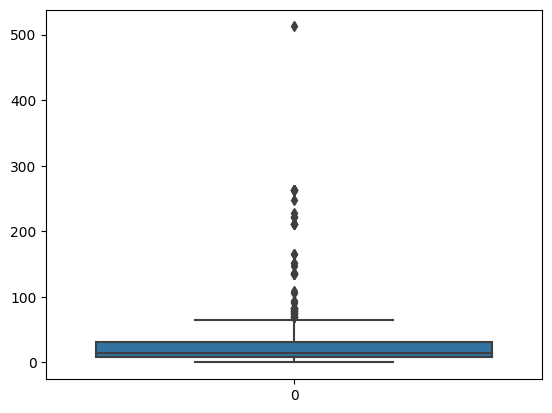

In [128]:
sns.boxplot(df['Fare'])

In [129]:
print('People With Fare In Between $0-$200 Are ',df[(df['Fare']>0) & (df['Fare']<200)].shape[0])
print('People With Fare In Between $200-$300 Are ',df[(df['Fare']>200) & (df['Fare']<300)].shape[0])
print('People With Fare Greater Than $300 Are ',df[df['Fare']>300].shape[0])

People With Fare In Between $0-$200 Are  398
People With Fare In Between $200-$300 Are  17
People With Fare Greater Than $300 Are  1


### Conclusion

This information suggests that the fare distribution on the Titanic was heavily skewed towards lower fares, possibly indicating that the majority of passengers traveled in lower-class accommodations. The single passenger with a fare greater than $300 might have been in a higher-class accommodation or had some other exceptional circumstance. There are outliers in the data.

## MultiVariate Analysis

### Survival With Pclass

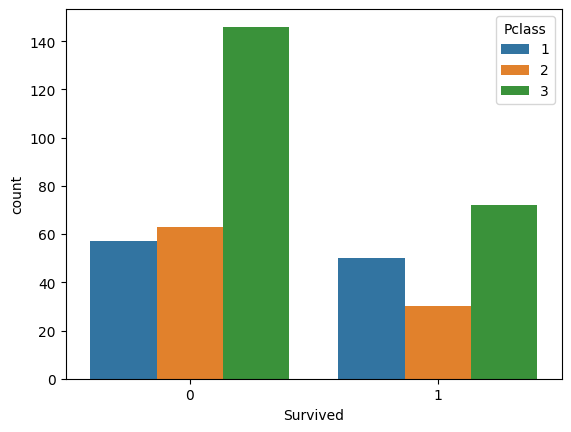

Survived,0,1
Pclass,,
1,53.3,46.7
2,67.7,32.3
3,67.0,33.0


In [130]:
sns.countplot(x='Survived', data=df, hue=df['Pclass'])
plt.show()


pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r / r.sum() * 100), 1), axis=1)


### Conclusion

In Pclass 1, 53.3% People Died And 46.7% People Survived

In Pclass 2, 67.7% People Died And 32.3% People Survived

In Pclass 3, 67% People Died And 33% People Survived

### Survival With Sex

Survived,0,1
Sex,,
female,0.0,100.0
male,100.0,0.0


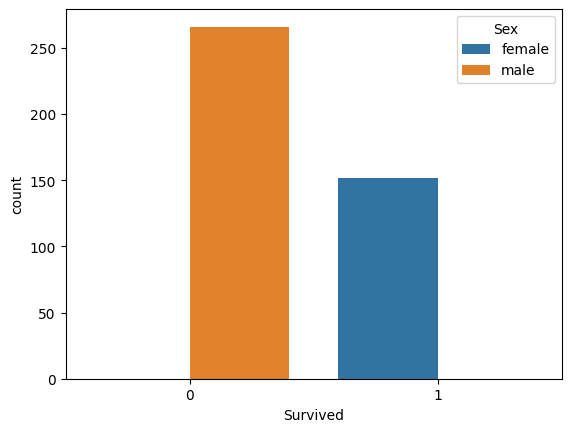

In [131]:
sns.countplot(data=df, x='Survived', hue='Sex')

pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

### Survival With Embarked

Survived,0,1
Embarked,,
C,60.8,39.2
Q,47.8,52.2
S,67.4,32.6


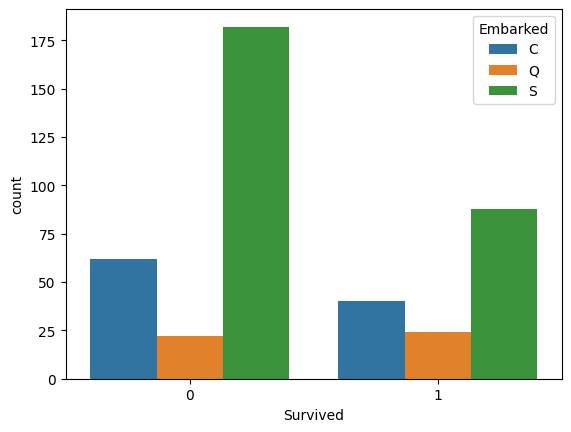

In [132]:
sns.countplot(data=df, x='Survived', hue='Embarked')

pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

### Survival With Age

Survived,0,1
Age,,
0,60.0,40.0
1,0.0,100.0
2,50.0,50.0
3,0.0,100.0
5,100.0,0.0
...,...,...
62,100.0,0.0
63,50.0,50.0
64,33.3,66.7


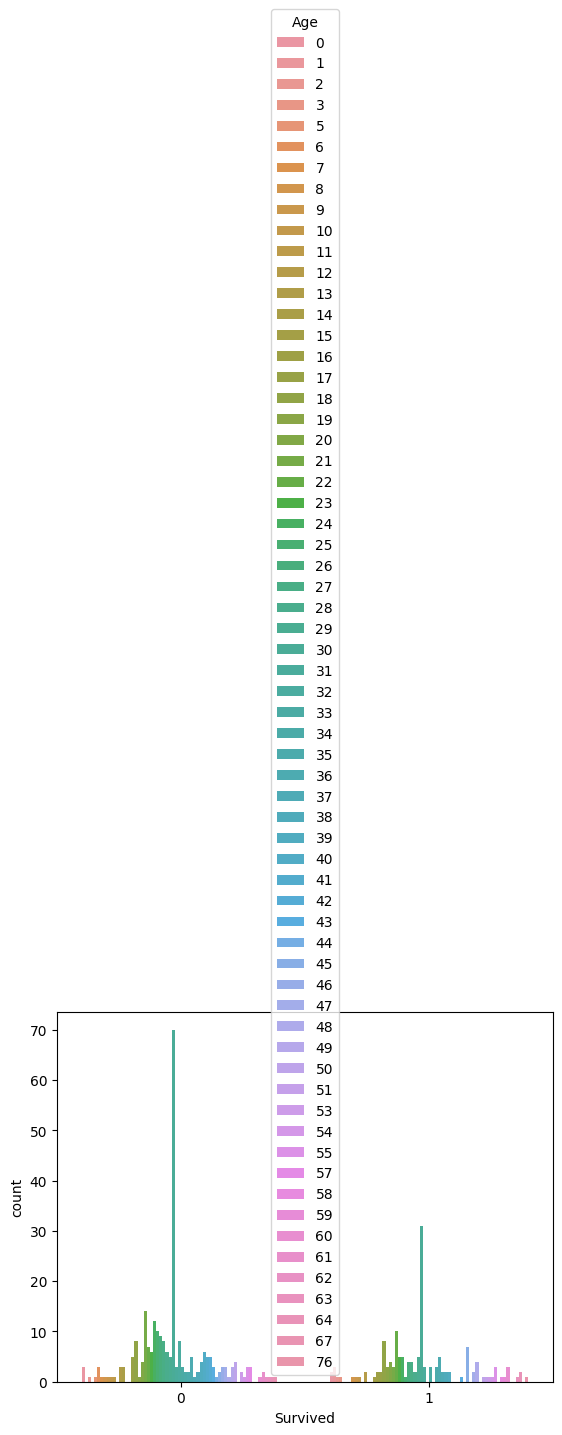

In [133]:
sns.countplot(data=df, x='Survived', hue='Age')

pd.crosstab(df['Age'], df['Survived']).apply(lambda r: round((r / r.sum() * 100), 1), axis=1)

<Figure size 1500x600 with 0 Axes>

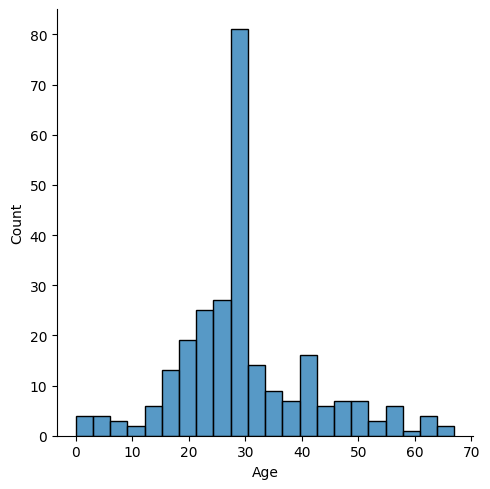

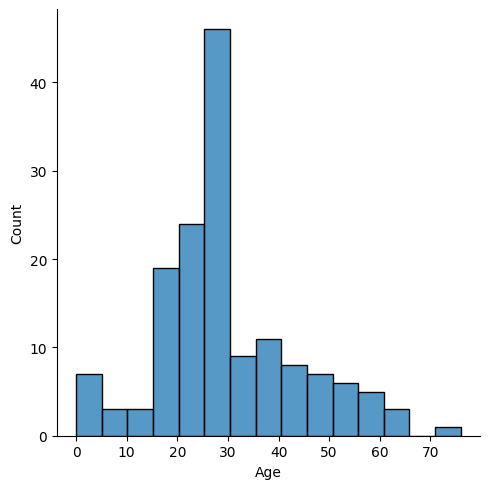

In [134]:
plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Age'])
sns.displot(df[df['Survived']==1]['Age'])
plt.show()

### Survived With Fare

<Figure size 1500x600 with 0 Axes>

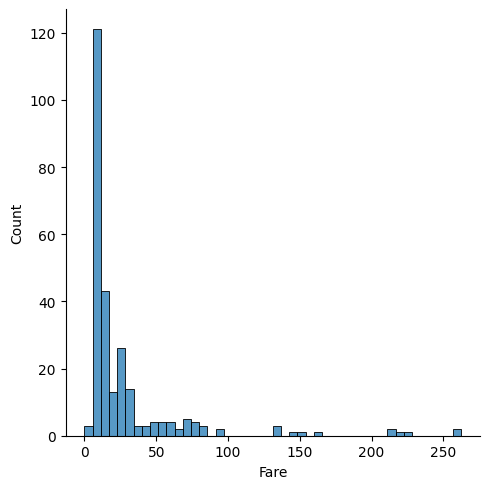

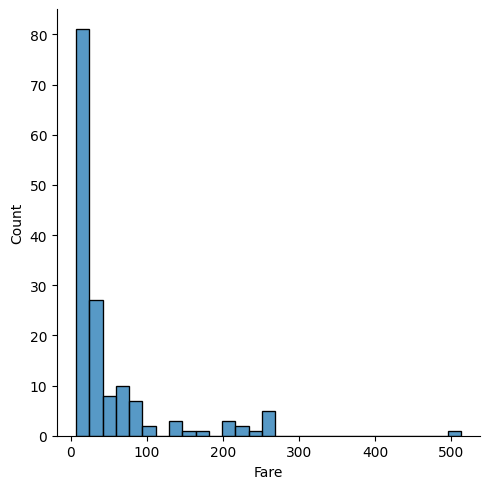

In [135]:
plt.figure(figsize=(15,6))
sns.displot(df[df['Survived']==0]['Fare'])
sns.displot(df[df['Survived']==1]['Fare'])
plt.show()

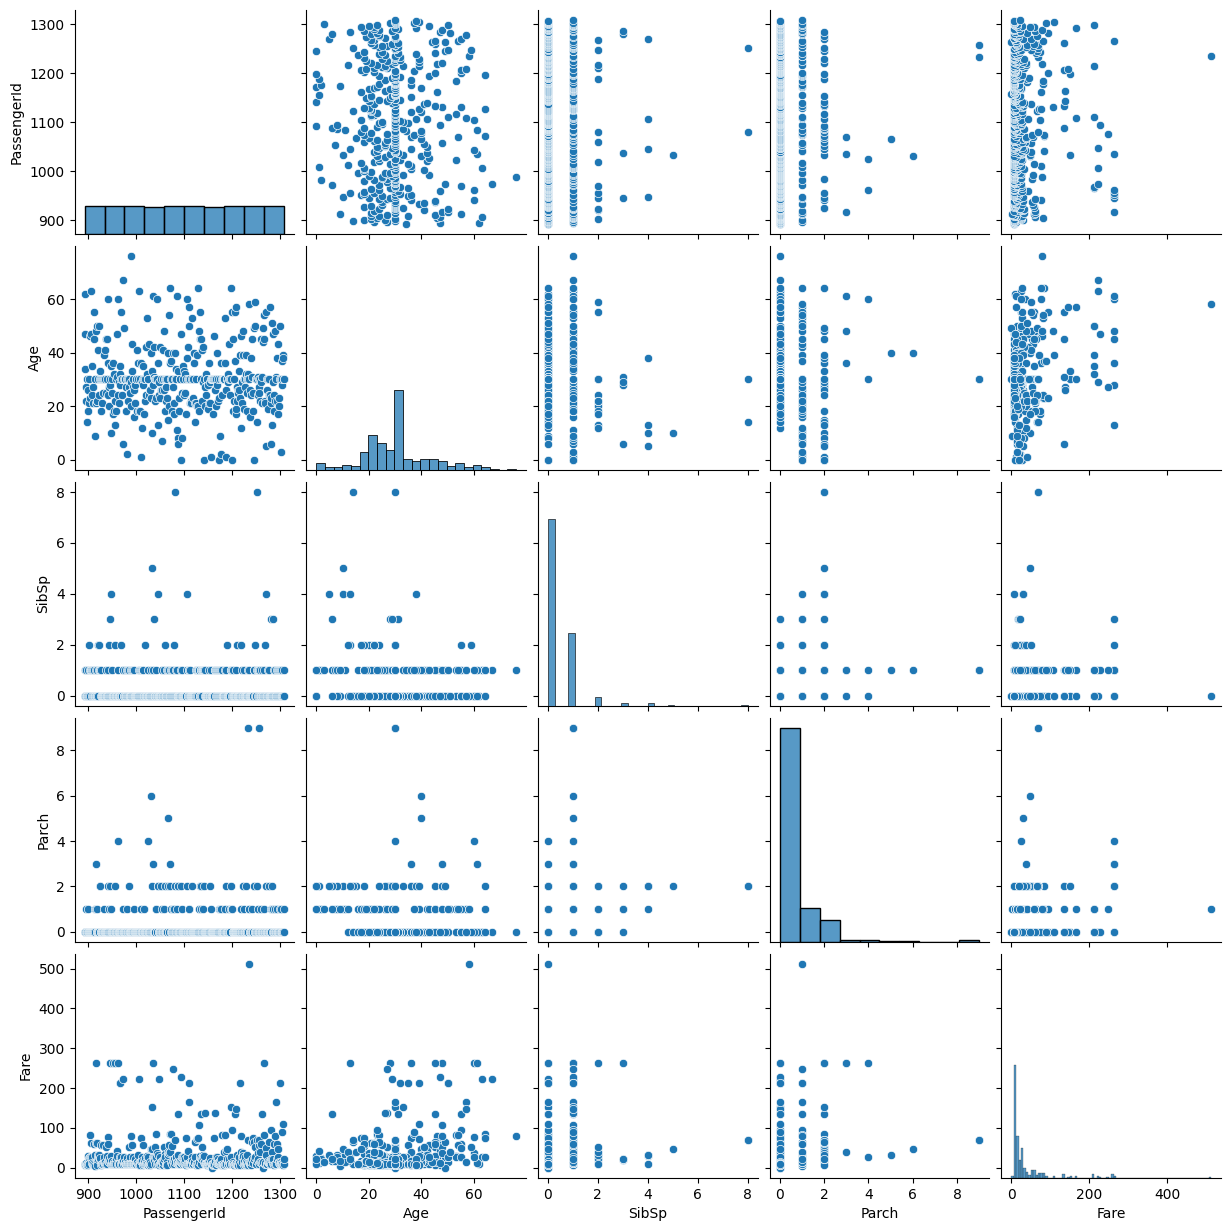

In [136]:
sns.pairplot(df)

<ipython-input-137-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

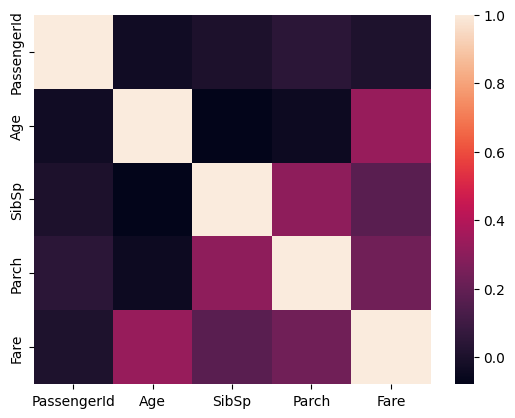

In [137]:
sns.heatmap(df.corr())

## Feature Engineering

We Will Create New Column By The Name of Family Which Will Be The Sum of SibSp and Parch Columns

In [138]:
df['FamilySize']=df['Parch']+df['SibSp']

In [139]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
86,978,1,3,"Barry, Miss. Julia",female,27,0,0,330844,7.8792,Q,0
205,1097,0,1,"Omont, Mr. Alfred Fernand",male,30,0,0,F.C. 12998,25.7417,C,0
282,1174,1,3,"Fleming, Miss. Honora",female,30,0,0,364859,7.7500,Q,0
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14,0,0,7538,9.2250,S,0
337,1229,0,3,"Elias, Mr. Joseph",male,39,0,2,2675,7.2292,C,2


#### Now We Will Engineer A New Feature By The Name of Family Type



In [140]:
def family_type(number):
  if number==0:
    return 'Alone'
  elif number>0 and number<=4:
    return 'Medium'
  else:
    return 'Large'

In [141]:
df['family_type']=df['FamilySize'].apply(family_type)

In [142]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,family_type
22,914,1,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,30,0,0,PC 17598,31.6833,S,0,Alone


### Dropping SibSp, Parch And FamilySize As We Have familytype So We Dont Need The Other Columns

In [143]:
df.drop(columns=['SibSp','Parch','FamilySize'], inplace=True)

In [144]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,family_type
219,1111,0,3,"Thomson, Mr. Alexander Morrison",male,30,32302,8.05,S,Alone


In [145]:
pd.crosstab(df['family_type'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
family_type,,
Alone,73.1,26.9
Large,53.8,46.2
Medium,48.7,51.3


#### Conclusion
If Travelling Alone , 73.3% People Died And 26.9% People Survived

If Travelling With Family, 53.8% People Died And 46.2% People Survived

If Travelling More Than One Person With You, 48.7% People Died And 51.3% People Survived



# Detecting Outliers

## Numerical Data
If the data is following normal distribution, anything beyond 3 times standard deviation mean * 3 standard deviation can be considered as an outliers

If the data does not follow noraml distributoin using boxplot we can eliminate points beyond Q1-1.5IQR and Q3 + 1.5IQR

## Categorical Data

If the columns is higly imbalanced for example Male 10000 and Female 2 Then We Can Eliminate Female.

In [147]:
#Handling Outliers In Age(Almost Normal)


df = df[df['Age']<(df['Age'].mean() + df['Age'].std())]
df.shape

(308, 10)

In [149]:
#Handling Outliers From Fare Columns

#Finding Quartiles

Q1 = np.percentile(df['Fare'],25)
Q3 = np.percentile(df['Fare'],75)

outlier_low = Q1 - 1.5 * (Q3-Q1)
outlier_high = Q3 + 1.5 * (Q3-Q1)

df=df[(df['Fare']>outlier_low) & (df['Fare']<outlier_high)]

### One Hot Encoding

In [151]:
#Columns To Be Transformed Are Pclass, Sex, Embarked, family_type

pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

,PassengerId,Survived,Name,Age,Ticket,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,892,0,"Kelly, Mr. James",34,330911,7.8292,0,1,1,1,0,0,0
3,895,0,"Wirz, Mr. Albert",27,315154,8.6625,0,1,1,0,1,0,0
4,896,1,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22,3101298,12.2875,0,1,0,0,1,0,1
5,897,0,"Svensson, Mr. Johan Cervin",14,7538,9.2250,0,1,1,0,1,0,0
6,898,1,"Connolly, Miss. Kate",30,330972,7.6292,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
410,1302,1,"Naughton, Miss. Hannah",30,365237,7.7500,0,1,0,1,0,0,0
412,1304,1,"Henriksson, Miss. Jenny Lovisa",28,347086,7.7750,0,1,0,0,1,0,0
413,1305,0,"Spector, Mr. Woolf",30,A.5. 3236,8.0500,0,1,1,0,1,0,0
416,1308,0,"Ware, Mr. Frederick",30,359309,8.0500,0,1,1,0,1,0,0


In [152]:
df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'], drop_first=True)

<ipython-input-159-5c05c18ecdfc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='viridis')


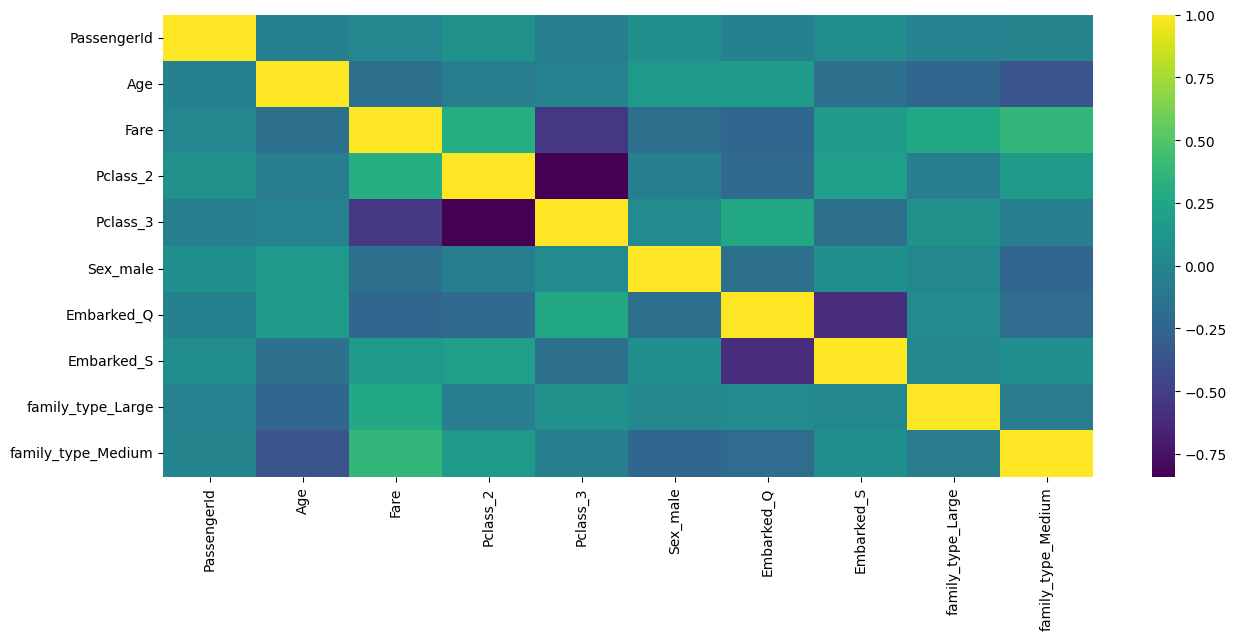

In [159]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), cmap='viridis')
plt.show()

## EDA Conclusion

- The data analysis reveals a significantly higher chance of survival for female passengers compared to their male counterparts. The Titanic's tragedy showcased the courage and resilience of women during that fateful event or maybe men are more caring.

- It is evident from the data that traveling in the third passenger class (Pclass 3) carried the highest risk of not surviving the disaster. This unfortunate reality highlights the disparities in accommodation conditions and emergency access between classes.

- Interestingly, passengers embarking from location 'C' demonstrated a notably higher survival rate. While the reasons behind this observation may warrant further investigation, it points to a potential correlation between embarkation point and survival outcomes.

- The age range of 20 to 40 years posed a higher chance of not surviving the calamity.

- The data strongly suggests that passengers traveling with smaller families had a comparatively higher chance of survival. Conversely, those traveling with larger families or alone faced more significant difficulties in ensuring their safety during the catastrophic.

#### These conclusions underscore the importance of understanding the historical context and socio-economic factors that played a crucial role in shaping the outcomes of the Titanic's ill-fated journey.